In [5]:
import numpy as np
import pandas as pd

In [6]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv('/content/gurgaon_properties_cleaned_1.csv')

In [10]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,independent,sector 105,0.74,7400.0,1000.0,Built Up area: 1000 (92.9 sq.m.),3,3,0,not available,2.0,NaN,undefined,NaN,NaN,NaN
1,flat,tulip ivory,sector 70,5.00,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6 Bedrooms,7,3+,"study room,servant room",0.0,NaN,1 to 5 Year Old,"['Reach 3 Roads Shopping Mall', 'Southern Periphery Road', 'Indus World School', 'DPG Institute of Technology', 'Polaris Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'Radisson Hotel Sohna Road', 'SkyJumper Trampoline Park', 'SportsCube Center(Sports Complex)']",[],"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [9]:
df.duplicated().sum()

np.int64(122)

# focus is on ----------->
###1. areaWithType,
###2. additionalRoom,
###3. agePossession,
###4. furnishDetails,
###5. features

In [12]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,independent,sector 105,0.74,7400.0,1000.0,Built Up area: 1000 (92.9 sq.m.),3,3,0,not available,2.0,NaN,undefined,NaN,NaN,NaN
1,flat,tulip ivory,sector 70,5.00,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6 Bedrooms,7,3+,"study room,servant room",0.0,NaN,1 to 5 Year Old,"['Reach 3 Roads Shopping Mall', 'Southern Periphery Road', 'Indus World School', 'DPG Institute of Technology', 'Polaris Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'Radisson Hotel Sohna Road', 'SkyJumper Trampoline Park', 'SportsCube Center(Sports Complex)']",[],"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Club house / Community Center']"
2,flat,signature global park,sohna road,0.90,8035.0,1120.0,Super Built up area 1120(104.05 sq.m.),3 Bedrooms,2,2,not available,2.0,South,Dec 2024,"['Sector 55-56 metro', 'Global city centre', 'Sohna road dhunela', 'Gd goenka university', 'Maharana pratap school', 'Vardaan hospital and trauma centre', 'Indira Gandhi International Airport', 'Garhi harsaru railway station Gurgaon']",[],"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
3,house,independent,sector 47,5.15,26615.0,1935.0,Plot area 215(179.77 sq.m.),9,9,3+,store room,3.0,East,1 to 5 Year Old,"['Standard chartered ATM', 'Icici bank ATM', 'Meher Clinic', 'Park Hospital Gurgaon', 'Vishesh Dental', 'Bones Clinic - Orthopaedics', 'Neelkanth Health Care', 'Sukhmani Hospital Pvt. Ltd', 'Best Urologist Atcomplete Family Clinic', 'Dr. Naresh Pandita', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Dr. Anuj Sharma', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Skin Clinic', 'Divine Look Clinic Centre', 'Vatsalya Clinic', 'Dispencery', 'Medanta', 'Samvit Health Care', 'Wembley estate club', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'Pernod Ricard Charitable Dispensary', 'SPAZE BUSINESS PARK', 'India Oil', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'SRS Cinemas', 'SRS Cinemas', 'Haldiram', 'India', 'Madison and Pike', ""Domino's Pizza"", 'KFC', 'Raj Restaurant', ""Nirula's"", 'Delhi Public School Primary Section', 'Gurugram University', 'Kamla International', 'Amity Global School', 'Manav Rachna School', 'St. Angels Sr', 'CR Model Public School', 'Manav Rachna Swimming Pool']","['9 Wardrobe', '13 Fan', '1 Exhaust Fan', '23 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Park', 'Bank Attached Property', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Rain Water Harvesting']"
4,flat,central park flower valley aqua front towers,sector 33,1.70,9502.0,1789.0,Super Built up area 1789(166.2 sq.m.),3 Bedrooms,3,3,not available,12.0,NaN,Under Construction,"['Taj Hotel & Family Restaurant', 'Signature Global Park', 'Signum 36', 'Ashiana Anmol Kid Centric Homes', 'KR Mangalam University', 'G D Go

# 1. areaWithType

In [15]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
450,1.62,1617.0,Super Built up area 1617(150.22 sq.m.)
1245,0.38,624.0,Super Built up area 624(57.97 sq.m.)
2126,0.89,2037.0,Super Built up area 2025(188.13 sq.m.)
813,3.50,2250.0,Plot area 2050(190.45 sq.m.)Built Up area: 2250 sq.ft. (209.03 sq.m.)
2023,2.20,3200.0,Plot area 3200(297.29 sq.m.)


In [16]:
import re

###def 1. get_super_built_area(text) – Extracts the Super Built-up Area.

###def 2. get_area(text, area_type) – Extracts any area type like "Built Up area", "Carpet area", etc.

###def 3. convert_to_sqft(text, area_value) – Converts sq.m. to sqft if the original value is in sq.m

In [20]:
def get_super_built_area(text):
  match= re.search(r'Super Built up area (\d+\.?\d*)', text)
  # It will try to extract the number after the words "Super Built up area".

  if match :
    return float(match.group(1))
  return None

### It finds the number (area value) from text based on the area type (like "Carpet area" or "Built Up area").

In [18]:

def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    #get_area("Carpet area: 1250.5 sq ft", "Carpet area")
    #returns 1250.5

    if match:
        return float(match.group(1))
    return None

### It checks if the area (like 125.5) is given in square meters, and if yes, converts it to square feet

In [19]:

def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [21]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_area)

# It checks if the values in 'super_built_up_area' column are in square meters,
#and converts them to square feet, using the original text in 'areaWithType'.
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [22]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3732,1.65,flat,2903.0,Super Built up area 2727(253.35 sq.m.),2727.0,NaN,NaN
3057,3.80,flat,2164.0,Super Built up area 2164(201.04 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),2164.0,1700.00,1600.0
3366,7.49,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
860,0.82,flat,1523.0,Super Built up area 1523(141.49 sq.m.)Built Up area: 1221.18 sq.ft. (113.45 sq.m.),1523.0,1221.18,NaN
350,0.30,flat,567.0,Built Up area: 567 (52.68 sq.m.),NaN,567.00,NaN


In [24]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [25]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,5.15,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
6,11.00,house,4125.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
12,11.00,house,2700.0,Plot area 360(301.01 sq.m.)Built Up area: 361 sq.yards (301.84 sq.m.)Carpet area: 300 sq.yards (250.84 sq.m.),NaN,361.0,300.0
14,4.50,house,4950.0,Plot area 550(459.87 sq.m.),NaN,NaN,NaN
16,5.70,house,3870.0,Plot area 430(359.53 sq.m.)Built Up area: 4550 sq.yards (3804.38 sq.m.)Carpet area: 4450 sq.yards (3720.77 sq.m.),NaN,4550.0,4450.0


In [26]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,26
price_per_sqft,26
area,26
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [27]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [28]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,5.15,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
6,11.00,house,4125.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
14,4.50,house,4950.0,Plot area 550(459.87 sq.m.),NaN,NaN,NaN
19,9.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
23,5.50,house,300.0,Plot area 300(27.87 sq.m.),NaN,NaN,NaN


In [29]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [30]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [31]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [32]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,5.15,house,1935.0,Plot area 215(179.77 sq.m.),NaN,215.00,NaN
6,11.00,house,4125.0,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
14,4.50,house,4950.0,Plot area 550(459.87 sq.m.),NaN,550.00,NaN
19,9.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
23,5.50,house,300.0,Plot area 300(27.87 sq.m.),NaN,300.00,NaN
24,1.50,house,1170.0,Plot area 130(108.7 sq.m.),NaN,130.00,NaN
45,2.10,house,900.0,Plot area 100(83.61 sq.m.),NaN,100.00,NaN
46,2.50,house,963.0,Plot area 107(89.47 sq.m.),NaN,107.00,NaN
49,6.00,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
56,0.80,house,1200.0,Plot area 1200(111.48 sq.m.),NaN,1200.00,NaN


### convert into same scale

In [35]:

def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [33]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [34]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,5.15,house,1935.0,Plot area 215(179.77 sq.m.),NaN,1935.00,NaN
6,11.00,house,4125.0,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
14,4.50,house,4950.0,Plot area 550(459.87 sq.m.),NaN,4950.00,NaN
19,9.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
23,5.50,house,300.0,Plot area 300(27.87 sq.m.),NaN,300.00,NaN
24,1.50,house,1170.0,Plot area 130(108.7 sq.m.),NaN,1170.00,NaN
45,2.10,house,900.0,Plot area 100(83.61 sq.m.),NaN,900.00,NaN
46,2.50,house,963.0,Plot area 107(89.47 sq.m.),NaN,963.00,NaN
49,6.00,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.00,NaN
56,0.80,house,1200.0,Plot area 1200(111.48 sq.m.),NaN,1200.00,NaN


In [36]:
# update the original dataframe

df.update(all_nan_df)

In [37]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,independent,sector 105,0.74,7400.0,1000.0,Built Up area: 1000 (92.9 sq.m.),3,3,0,not available,2.0,NaN,undefined,NaN,NaN,NaN,NaN,1000.0,NaN
1,flat,tulip ivory,sector 70,5.00,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6 Bedrooms,7,3+,"study room,servant room",0.0,NaN,1 to 5 Year Old,"['Reach 3 Roads Shopping Mall', 'Southern Periphery Road', 'Indus World School', 'DPG Institute of Technology', 'Polaris Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'Radisson Hotel Sohna Road', 'SkyJumper Trampoline Park', 'SportsCube Center(Sports Complex)']",[],"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,4800.0


In [38]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,26
price_per_sqft,26
area,26
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


### 2. additional Room

In [39]:
df['additionalRoom'].value_counts()

,count
additionalRoom,
not available,1598
servant room,705
study room,250
others,225
pooja room,165
"study room,servant room",99
store room,99
"pooja room,servant room",82
"pooja room,study room,servant room,store room",72


In [40]:
# list of new columns to be created

new_col = ['study room','servant room','store room','pooja room','others']

# populate the new columns based on the "additional Room" columns
for col in new_col:
  df[col] = df['additionalRoom'].str.contains(col).astype(int)

  # --> [True, False, False]
  # Converts the True/False values into 1 and 0..... by using  .astype(int)

In [43]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
671,servant room,0,1,0,0,0
329,not available,0,0,0,0,0
2058,not available,0,0,0,0,0
2865,"study room,servant room,pooja room,store room",1,1,1,1,0
1473,not available,0,0,0,0,0


# 3. agePossession

In [44]:
df['agePossession'].value_counts()

,count
agePossession,
1 to 5 Year Old,1676
5 to 10 Year Old,577
0 to 1 Year Old,532
undefined,340
10+ Year Old,310
Under Construction,89
Within 6 months,70
Within 3 months,26
Dec 2023,22


In [47]:
def categorize_age_possession(value):
  if pd.isna(value):
    return 'Undefined'

  if '0 to 1 Year Old' in value or 'Within 6 months' in value or 'Within 3 months' in value:
    return 'New Property'

  if '1 to 5 Year Old' in value:
    return 'Relatively New'

  if '5 to 10 Year Old' in value:
    return 'Moderately Old'

  if '10+ Year Old' in value:
    return 'Old Property'

  if 'Under Construction' in value or 'By' in value:
    return 'Under Construction'

  try:
    int(value.split(" ")[-1])
    return "Under Construction"

  except:
    return "Undefined"

In [52]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [53]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1676
New Property,628
Moderately Old,577
Undefined,341
Old Property,310
Under Construction,282


In [54]:
df.head(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,independent,sector 105,0.74,7400.0,1000.0,Built Up area: 1000 (92.9 sq.m.),3,3,0,not available,2.0,NaN,Undefined,NaN,NaN,NaN,NaN,1000.0,NaN,0,0,0,0,0
1,flat,tulip ivory,sector 70,5.00,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6 Bedrooms,7,3+,"study room,servant room",0.0,NaN,Relatively New,"['Reach 3 Roads Shopping Mall', 'Southern Periphery Road', 'Indus World School', 'DPG Institute of Technology', 'Polaris Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'Radisson Hotel Sohna Road', 'SkyJumper Trampoline Park', 'SportsCube Center(Sports Complex)']",[],"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,4800.0,1,1,0,0,0
2,flat,signature global park,sohna road,0.90,8035.0,1120.0,Super Built up area 1120(104.05 sq.m.),3 Bedrooms,2,2,not available,2.0,South,Under Construction,"['Sector 55-56 metro', 'Global city centre', 'Sohna road dhunela', 'Gd goenka university', 'Maharana pratap school', 'Vardaan hospital and trauma centre', 'Indira Gandhi International Airport', 'Garhi harsaru railway station Gurgaon']",[],"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1120.0,NaN,NaN,0,0,0,0,0


# 4. furnish Details

In [56]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
3547,"['5 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2224,NaN,"['Intercom Facility', 'Lift(s)', 'Feng Shui / Vaastu Compliant', 'Internet/wi-fi connectivity', 'Swimming Pool', 'Park', 'Club house / Community Center', 'Fitness Centre / GYM']"
2745,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1881,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '20 Light', '1 Chimney', '1 Modular Kitchen', '4 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Park']"
1232,"['2 Wardrobe', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '1 Modular Kitchen', '1 Chimney', '3 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"


In [57]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))


###get_furnishing_count("['2 Fan', 'No Light']", "Fan") → 2  
###get_furnishing_count("['2 Fan', 'No Light']", "Light") → 0

In [58]:
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0


### Remove the "No " and any digits from each string:    'No AC' → 'AC'
### Then use set() to get unique clean names: ['Fan', 'Light', 'AC']

In [59]:

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings


### For every item like "Fan", "Light", "AC":

###Apply the helper function to each row in furnishDetails.

###Result is a new column with the count of that item.

In [60]:
# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))


In [61]:
# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [62]:
furnishings_df.shape

(3814, 19)

In [63]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-63-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [64]:
furnishings_df.sample(5)

,Stove,Fan,Dining Table,Geyser,Chimney,Light,Curtains,Wardrobe,AC,Bed,Microwave,Water Purifier,Sofa,Washing Machine,TV,Exhaust Fan,Fridge,Modular Kitchen
3065,0,5,0,0,0,6,0,0,5,0,0,0,0,0,0,0,0,1
3577,0,5,0,3,1,4,0,3,4,0,0,0,0,0,0,1,0,1
353,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Now apply k-means clustring---> for making it in 3 main category
### we cant use all 18 dimention info

In [65]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [67]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

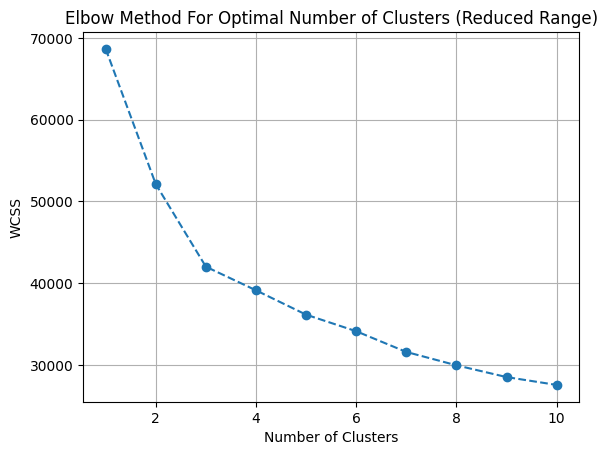

In [68]:
# Plot the results
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [69]:

n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [70]:
df = df.iloc[:,:-18]

In [71]:
df['furnishing_type'] = cluster_assignments

In [75]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
511,"['1 Water Purifier', '1 Fridge', '5 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '6 Light', '1 Modular Kitchen', '1 Chimney', '4 Wardrobe', '1 Microwave', '1 Washing Machine', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV']",2
2911,NaN,0
3677,"['6 Wardrobe', '3 Fan', '1 Exhaust Fan', '1 Geyser', '8 Light', '1 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
1494,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '11 Light', '5 AC', '1 Modular Kitchen', '1 Curtains', '1 Chimney', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
2922,"['3 Wardrobe', '1 Exhaust Fan', '1 Stove', '10 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",1


#5. Features

In [80]:
df[['society','features']].sample(4)

,society,features
1669,independent,NaN
2410,smart world orchard,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking']"
856,sare crescent parc,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
3097,eros rosewood villas,"['Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']"


In [81]:
df['features'].isna().sum()

np.int64(646)

In [82]:
app_df = pd.read_csv('/content/real_estate_data - real_estate_data.csv')
app_df.head(3)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"
2,Adani Brahma Samsara Vilasa,"Land, 3, 4 BHK Independent Floor in Sector 63, Gurgaon","['AIPL Business Club Sector 62', 'Heritage Xperiential Learning School', 'CK Birla Hospital', 'Paras Trinity Mall Sector 63', 'Rapid Metro Station Sector 56']","{'AIPL Business Club Sector 62': '2.7 Km', 'Heritage Xperiential Learning School': '2 Km', 'CK Birla Hospital': '2.5 Km', 'Paras Trinity Mall Sector 63': '3.5 Km', 'Rapid Metro Station Sector 56': '3.8 Km', 'De Adventure Park': '6.8 Km', 'Golf Course Ext Rd': '99 Meter', 'DoubleTree by Hilton Hotel Gurgaon': '3.6 Km', 'KIIT College of Engineering Sohna Road': '8.4 Km', 'Mehrauli-Gurgaon Road': '11.8 Km', 'Indira Gandhi International Airport': '21.1 Km', 'Nirvana Rd': '160 Meter', 'TERI Golf Course': '8.7 Km'}",https://www.99acres.com/adani-brahma-samsara-vilasa-sector-63-gurgaon-npxid-r327995,"{'3 BHK': {'building_type': 'Independent Floor', 'area_type': 'Super Built-up Area', 'area': '1,800 - 3,150 sq.ft.', 'price-range': '₹ 2.43 - 15.75 Cr'}, '4 BHK': {'building_type': 'Independent Floor', 'area_type': 'Super Built-up Area', 'area': '2,750 - 4,500 sq.ft.', 'price-range': '₹ 3.36 - 22.5 Cr'}, 'Land': {'building_type': '', 'area_type': 'Plot Area', 'area': '500 - 4,329 sq.ft.', 'price-range': '₹ 2.05 - 41.13 Cr'}}","['Terrace Garden', 'Gazebo', 'Fountain', 'Amphitheatre', 'Party Lawn', 'Basketball Court', 'Badminton Court', 'Yoga/Meditation Area', 'Indoor Games']"


In [83]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [84]:
temp_df = df[df['features'].isnull()]

In [85]:
temp_df.shape

(646, 26)

In [86]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [87]:
df.loc[temp_df.index,'features'] = x.values

In [88]:
df['features'].isnull().sum()

np.int64(492)

In [92]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [93]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [94]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}

In [96]:
# calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [97]:

df['luxury_score'] = luxury_score

In [98]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
2627,house,independent,sector 39,1.80,21875.0,823.0,Plot area 900(83.61 sq.m.)Built Up area: 800 sq.ft. (74.32 sq.m.)Carpet area: 720 sq.ft. (66.89 sq.m.),1,1,2,not available,3.0,North-East,Relatively New,"['Axis bank ATM', 'State bank of india ATM', 'Icici bank ATM', 'Icici ATM', 'Citi bank ATM', 'Axis bank ATM', 'Hdfc ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Standard chartered ATM', 'Hdfc bank ATM', 'Dispencery', 'Sukhmani Hospital Pvt. Ltd', 'Shivam Hospital Gurgaon', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Bansal Medicare and Maternity Centre', 'Ahmed Hospital Multi Speciality', 'Dayal Eye & Maternity Centre', 'Pushpanjali Hospital Gurgaon', 'Samvit Health Care', 'Pushpanjali Hospital', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Gardian Pharmacy', 'Pernod Ricard Charitable Dispensary', 'City Medical', 'Gardian Pharmacy', 'IBP Petrol Pump', 'Bharat petroleum', 'Hdfc bank', 'Raj Restaurant', 'Om Sweets', 'Fast food', 'Fast Food', 'Bar and restaurant', 'KFC', 'Darbar', 'Cafe Coffee Day', '32nd Milestone', 'CR Model Public School', 'Manav Rachna School', 'St. Angels Jr', 'St. Angels Sr', 'Amity Global School', 'School of Inspired Leadership SOIL', 'Delhi Public School Primary Section', 'Salvan Public School', 'Manav Rachna Swimming Pool']",NaN,NaN,NaN,800.0,720.0,0,0,0,0,0,0,[],0
1797,flat,mapsko royale ville,sector 82,1.12,6256.0,1790.0,Super Built up area 1790(166.3 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3 Bedrooms,3,2,pooja room,12.0,North-East,Relatively New,"['Sapphire 83 Mall', 'Golf Course Ext Rd', ""St. Xavier's High School"", 'DPG Institute of Technology', 'Miracles Apollo Cradle', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Gurugram Sector 90', 'SkyJumper Trampoline Park', 'Vishalgarh Farms', 'F9 Go Karting Gurgaon']","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '1 Geyser', '12 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1790.0,NaN,1400.0,0,0,0,1,0,0,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
741,flat,bestech park view residency,sector 2,1.26,8051.0,1565.0,Super Built up area 1565(145.39 sq.m.),2 Bedrooms,2,3,study room,7.0,South-East,Moderately Old,"['Dwarka Sector 21 Metro Station', 'HUDA Market, Sector 14', 'Ambience Mall', 'GAV Public School', 'The NorthCap University', 'Chirag Hospital', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'DLF CyberHub', 'Fun N Food Village']","['2 Wardrobe', '4 Fan', '2 Geyser', '5 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1565.0,NaN,NaN,1,0,0,0,0,0,"[Security / Fire Alarm, Power Back-up, Lift(s), Maintenance Staff, Water Storage, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Shopping Centre, Fitness Centre / G

In [99]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [115]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1127,flat,rof ananda,sector 95,0.55,8527.0,645.0,Super Built up area 1000(92.9 sq.m.)Carpet area: 645 sq.ft. (59.92 sq.m.),3,2,2,14.0,East,New Property,1000.0,NaN,645.0,1,0,0,0,0,1,81
1099,house,sobha city,sector 108,10.50,14323.0,7331.0,Built Up area: 7331 (681.07 sq.m.),5,4,3+,1.0,East,Undefined,NaN,7331.0,NaN,0,0,0,0,0,0,59
3079,house,independent,sector 81,0.89,8127.0,1095.0,Built Up area: 1095 (101.73 sq.m.),1,1,0,1.0,NaN,Undefined,NaN,1095.0,NaN,0,0,0,0,0,0,0
3028,flat,dlf regency park,sector 28,1.60,14545.0,1100.0,Carpet area: 1100 (102.19 sq.m.),2,2,2,3.0,North,Relatively New,NaN,NaN,1100.0,0,0,0,0,0,0,52
2100,flat,la vida by tata housing,sector 113,1.93,12222.0,1579.0,Super Built up area 1579(146.69 sq.m.),3,3,2,8.0,NaN,Under Construction,1579.0,NaN,NaN,0,0,0,0,0,0,71


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3814 entries, 0 to 3813
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3814 non-null   object 
 1   society              3813 non-null   object 
 2   sector               3814 non-null   object 
 3   price                3788 non-null   float64
 4   price_per_sqft       3788 non-null   float64
 5   area                 3788 non-null   float64
 6   areaWithType         3814 non-null   object 
 7   bedRoom              3814 non-null   object 
 8   bathroom             3814 non-null   int64  
 9   balcony              3814 non-null   object 
 10  floorNum             3795 non-null   float64
 11  facing               2699 non-null   object 
 12  agePossession        3814 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1743 non-null   float64
 15  carpet_area          1946 non-null   f